<a href="https://colab.research.google.com/github/HWMV/Boston_house_prices_pred_model/blob/main/Boston_house_prices_pred_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston_house_prices_pred_model

### 보스턴 주택 가격에 대한 데이터로 가격을 예측 해볼 수 있는 모델을 만들어 보자!


## 1. 데이터 로드 및 표준화

In [29]:
# library import
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [30]:
# data set load
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [31]:
# # 데이터 형태 확인 하기
# # 확인한다고 맘대로 DataFrame 화 하면 안된다!!
# import pandas as pd

# df_train_data = pd.DataFrame(train_data)
# df_train_data

In [32]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
test_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= mean
test_data /= std

##2. 모델 구성 및 컴파일

In [33]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
# 회귀 모델이므로 출력 레이어의 뉴런은 1개
model.add(layers.Dense(1))

In [34]:
# model compile
model.compile(optimizer='adam',
              loss='mse', # 'mean_squared_error',
              metrics='mae') # 'mean_absolute_error')

In [35]:
# validation data separation
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.2, random_state=2023)

In [36]:
# model fit(history)
history = model.fit(train_data, train_labels, epochs=50,
                    batch_size = 32,
                    validation_data =(val_data, val_labels))

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 550.4407 - mae: 21.5435 - val_loss: 534.3229 - val_mae: 21.1148
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 484.5223 - mae: 19.9842 - val_loss: 468.0078 - val_mae: 19.5393
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 409.7054 - mae: 18.0960 - val_loss: 388.0246 - val_mae: 17.4500
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 322.0384 - mae: 15.6954 - val_loss: 294.5456 - val_mae: 14.6884
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 227.1131 - mae: 12.8843 - val_loss: 198.4891 - val_mae: 11.5543
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 145.5639 - mae: 9.7490 - val_loss: 123.8212 - val_mae: 8.3091
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 91.4407 - mae: 6.9373 - val_loss: 80.5382 - val_mae: 5.9844
Epoch 8/50
11/11 [==============================] - 0

<ipython-input-37-67e2570c3830>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


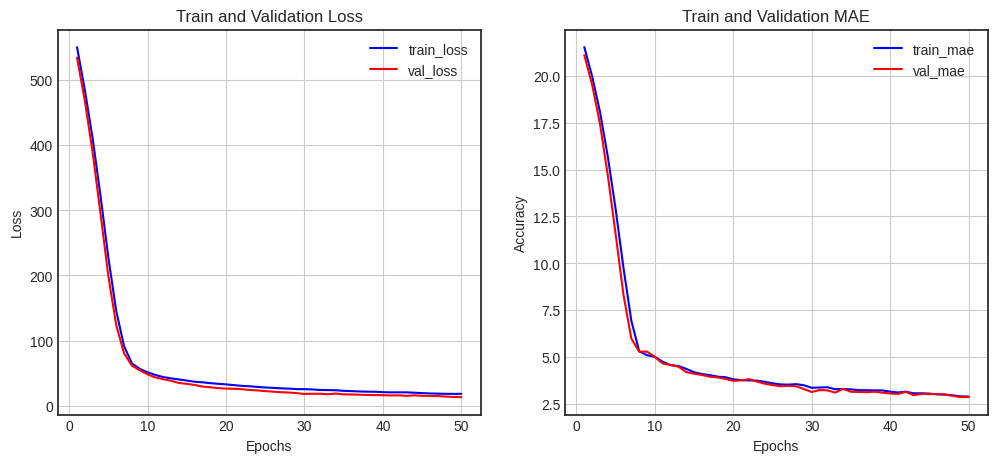

In [37]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 3. 모델 평가 및 예측

In [39]:
# 모델 평가 및 예측 (evaluate, predict)
# 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)
print(f"테스트 데이터 손실 (Test Loss): {test_loss}")
print(f"테스트 데이터 MAE (Test MAE): {test_mae}")

4/4 [==============================] - 0s 3ms/step - loss: 320.6361 - mae: 11.9356
테스트 데이터 손실 (Test Loss): 320.6361389160156
테스트 데이터 MAE (Test MAE): 11.935579299926758
